In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

In [2]:
boston = load_boston()

In [3]:
X_train, y_train = StandardScaler().fit_transform(boston.data), boston.target

In [4]:
X_train.shape, y_train.shape

((506, 13), (506,))

In [5]:
def performance(model):
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    score = np.sqrt(-scores).mean()
    return score

In [6]:
class MyLinearRegression(BaseEstimator):
    def __init__(self, max_iter=1000, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.w_ = None
    def fit(self, _X, y):
        n = _X.shape[0]
        m = _X.shape[1]
        w = np.zeros((m + 1, 1))
        X = _X.copy()
        X = np.c_[np.ones((n, 1)), X]
        for _ in range(self.max_iter):
            w -= self.learning_rate * 2 / n * X.T.dot(X.dot(w) - y.reshape(-1, 1))
#       w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.reshape(-1, 1))
        self.w_ = w
        return self
    def predict(self, _X):
        X = _X.copy()
        X = np.c_[np.ones((_X.shape[0], 1)), X]
        return X.dot(self.w_)

## MyLinearRegression和sklearn的LinearRegression达到相近的准确度

In [7]:
performance(MyLinearRegression())

10.665775466461513

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
performance(LinearRegression())

10.551452868405692

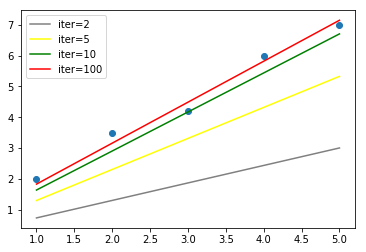

In [9]:
tmp_X = np.array([[1], [2], [3], [4], [5]])
tmp_y = np.array([[2], [3.5], [4.2], [6], [7]])

y_pred_my_2 = MyLinearRegression(max_iter=2).fit(tmp_X, tmp_y).predict(tmp_X)
y_pred_my_5 = MyLinearRegression(max_iter=5).fit(tmp_X, tmp_y).predict(tmp_X)
y_pred_my_10 = MyLinearRegression(max_iter=10).fit(tmp_X, tmp_y).predict(tmp_X)
y_pred_my_100 = MyLinearRegression(max_iter=100).fit(tmp_X, tmp_y).predict(tmp_X)

plt.scatter(x=tmp_X, y=tmp_y)
plt.plot(tmp_X, y_pred_my_2, color='gray', label='iter=2')
plt.plot(tmp_X, y_pred_my_5, color='yellow', label='iter=5')
plt.plot(tmp_X, y_pred_my_10, color='green', label='iter=10')
plt.plot(tmp_X, y_pred_my_100, color='red', label='iter=100')
plt.legend()
plt.show()